In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join("nbaGamesStats.csv"))
df.head()

,ID,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,OppFreeThrows,OppFreeThrowsAttempted,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [3]:
target = df["WINorLOSS"]
target_names = ["W", "L"]

In [4]:
data = df.drop(["WINorLOSS","ID","Date","Game","Home","Opponent","Team"], axis=1)
feature_names = data.columns
data.head()

,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals_pct,X3PointShots,X3PointShotsAttempted,X3PointShots_pct,FreeThrows,FreeThrowsAttempted,...,OppFreeThrows,OppFreeThrowsAttempted,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls
0,102,109,40,80,0.500,13,22,0.591,9,17,...,27,33,0.818,16,48,26,13,9,9,22
1,102,92,35,69,0.507,7,20,0.350,25,33,...,18,21,0.857,11,44,25,5,5,18,26
2,92,94,38,92,0.413,8,25,0.320,8,11,...,27,38,0.711,11,50,25,7,9,19,15
3,119,122,43,93,0.462,13,33,0.394,20,26,...,20,27,0.741,11,51,31,6,7,19,30
4,103,96,33,81,0.407,9,22,0.409,28,36,...,8,11,0.727,13,44,26,2,6,15,29


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.989430894308943

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9747967479674797

In [8]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.16439374479566288, 'OpponentPoints'),
 (0.15918066573132536, 'TeamPoints'),
 (0.08509795472110442, 'OppFieldGoals_pct'),
 (0.08455771036187412, 'FieldGoals_pct'),
 (0.05610669595070801, 'FieldGoals'),
 (0.05161231426538905, 'OppFieldGoals'),
 (0.031547377665134525, 'X3PointShots_pct'),
 (0.028886014644438466, 'Opp3PointShots_pct'),
 (0.023516460054761466, 'Assists'),
 (0.022648566921582115, 'OppTotalRebounds'),
 (0.021586720112024067, 'FreeThrows'),
 (0.021280574815803227, 'OppAssists'),
 (0.019299191400008735, 'OppFreeThrows'),
 (0.018561381193480633, 'TotalRebounds'),
 (0.017808363468954636, 'FreeThrowsAttempted'),
 (0.016312597624659125, 'OppFreeThrowsAttempted'),
 (0.01508110727264382, 'X3PointShots'),
 (0.014523545743074183, 'Opp3PointShots'),
 (0.012712581060311468, 'TotalFouls'),
 (0.012012932551606256, 'OppTotalFouls'),
 (0.010726246214425592, 'Turnovers'),
 (0.010152861754234643, 'OppFreeThrows_pct'),
 (0.010124134739163867, 'FreeThrows_pct'),
 (0.009925850569298388, 'OppT

In [25]:
fn=feature_names
cn=target_names

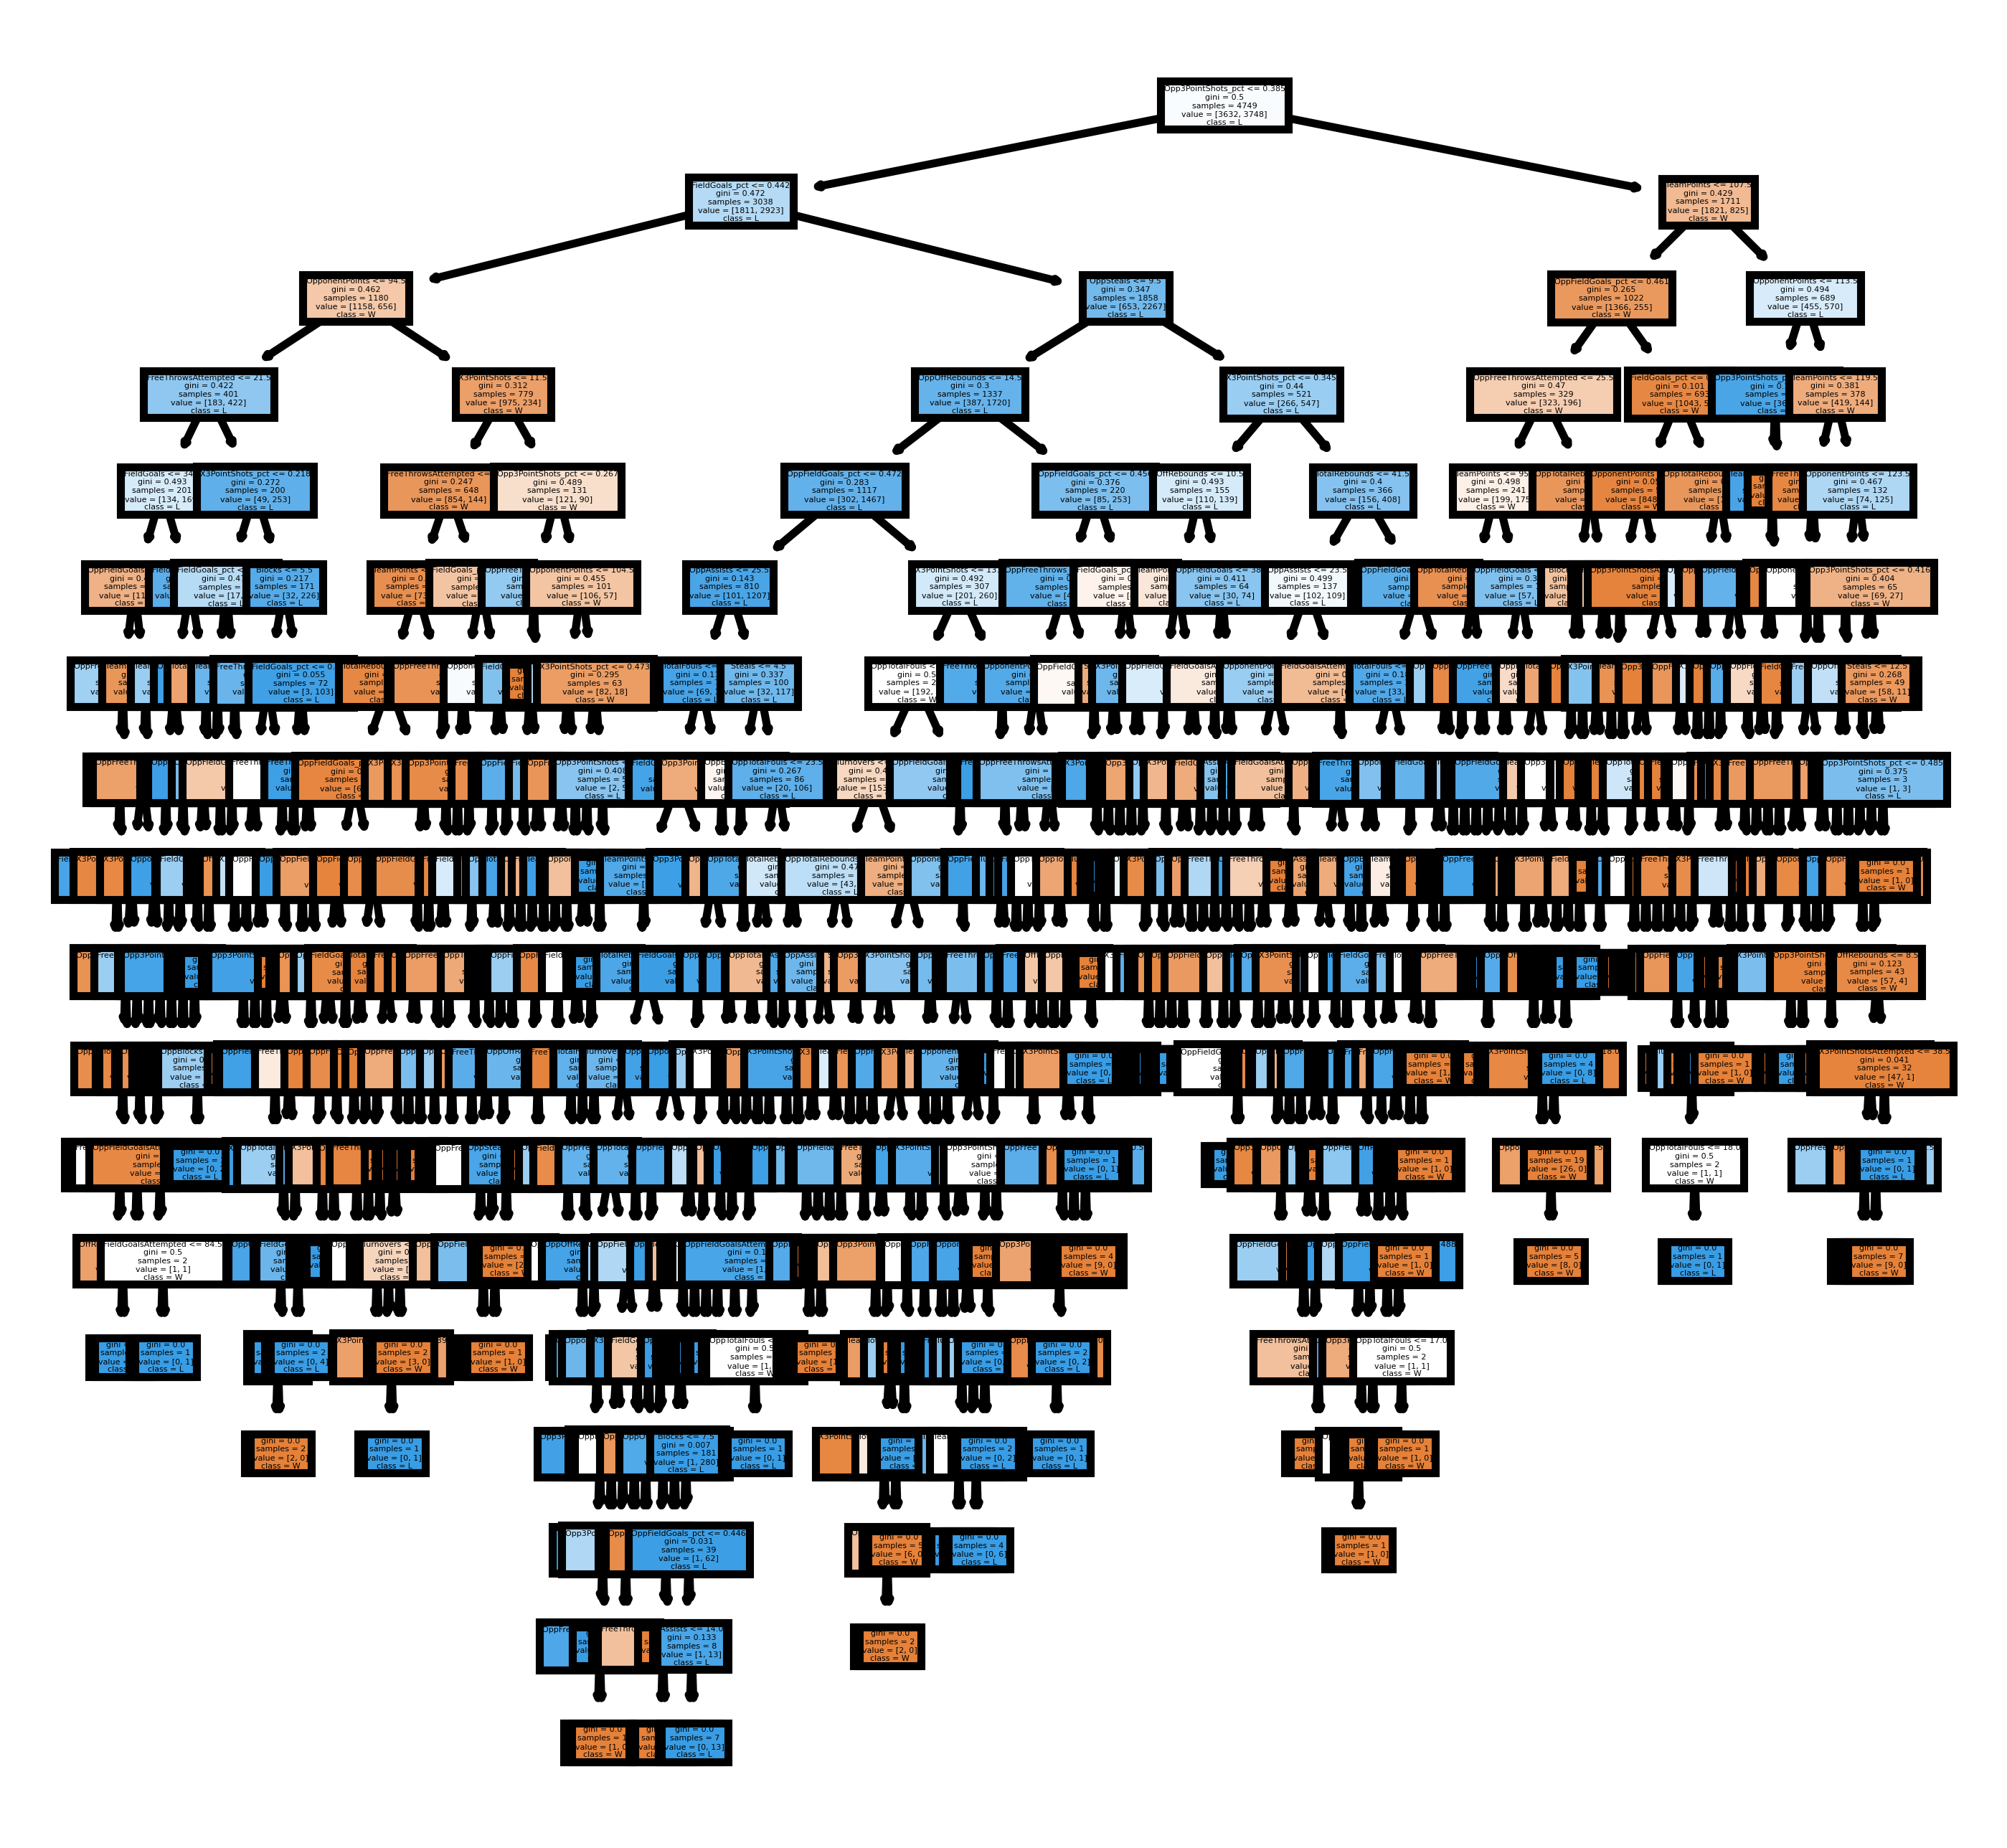

In [26]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [27]:
fig.savefig('rf_individualtree.png')